# Example of using the Borehole3D class

## Imports

In [1]:
from striplog import Component, Decor, Legend, Lexicon, Striplog
from core.omf import Borehole3D, striplog_legend_to_omf_legend 
from utils.io import boreholes_from_files, striplog_from_text,gdf_viewer,\
df_from_sources, striplog_from_df
from core.core import Project
from core.orm import BoreholeOrm, PositionOrm, Base 

import matplotlib.pyplot as plt
from os import remove
from sqlalchemy import create_engine
from sqlalchemy.orm import sessionmaker
from definitions import ROOT_DIR

## Reading of CSV files in a dir

In [2]:
search_dir=ROOT_DIR+'/CF_data/synthese/Result_traitem/'
cols=['ID','X','Y','Z','Long_Pz','Diam_Pz_int']
filename='source_Boreholes'

In [3]:
df_all=df_from_sources(search_dir, filename, cols, verbose=False)

--> base_Memoris3/source_Boreholes.csv: (148 lines)
--> profils_sols_donnees_forages/source_Boreholes.csv: (42 lines)

The overall dataframe contains 190 lines. 2 files used


## Data Checking

In [4]:
gdf_viewer(df_all)

Rows : 190, columns : 7


interactive(children=(IntSlider(value=10, description='rows', max=190, min=10, readout=False), IntSlider(value…

In [5]:
dist_crit=1

indexes = []
for i in range(0,len(df_all)-1):
    d=df_all.loc[i, 'geometry'].distance(df_all.loc[i+1, 'geometry'])
    if d<dist_crit or d>1e+4:
        indexes.append(i)
        #print(f"{df_all.loc[i,'ID']} <-> {df_all.loc[i+1,'ID']} : {d:.2} meters")
print('\n',f'{len(indexes)}/{len(df_all)} elements with probably bad XY')
print(f'\nIndexes: {indexes}\n\nNAN_indexes: {df_all.query("X!=X").index}')


 29/190 elements with probably bad XY

Indexes: [49, 66, 69, 71, 74, 76, 78, 115, 120, 121, 123, 166, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188]

NAN_indexes: Int64Index([173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185,
            186, 187, 188, 189],
           dtype='int64')


In [6]:
df_all.drop(index=df_all.query("X!=X").index, inplace=True)
df_all.reset_index(drop=True, inplace=True)
len(df_all)

173

## Create Boreholes from dataframes or files

In [7]:
bhs_df=[df_all]

In [8]:
boreholes, components= boreholes_from_files(bhs_df, verbose=True, 
                                            diam_field='Diam_Pz_int', 
                                            length_field='Long_Pz')


Dataframe 0 processing...
length=6.94
|__ID:'1' -- No lithology data, treated with default ('white sand')
{0: {'description': 'white sand', 'interval_number': 0, 'top': <core.orm.PositionOrm object at 0x7f67c69f66a0>, 'base': <core.orm.PositionOrm object at 0x7f67c6990400>}}

length=3.27
|__ID:'12' -- No lithology data, treated with default ('white sand')
{1: {'description': 'white sand', 'interval_number': 0, 'top': <core.orm.PositionOrm object at 0x7f67c6a45820>, 'base': <core.orm.PositionOrm object at 0x7f67c6a1db20>}}

length=6.04
|__ID:'22' -- No lithology data, treated with default ('white sand')
{2: {'description': 'white sand', 'interval_number': 0, 'top': <core.orm.PositionOrm object at 0x7f67c6990f40>, 'base': <core.orm.PositionOrm object at 0x7f67c6990fd0>}}

length=6.51
|__ID:'25' -- No lithology data, treated with default ('white sand')
{3: {'description': 'white sand', 'interval_number': 0, 'top': <core.orm.PositionOrm object at 0x7f67c69a3970>, 'base': <core.orm.Positio

|__ID:'509' -- No lithology data, treated with default ('white sand')
{86: {'description': 'white sand', 'interval_number': 0, 'top': <core.orm.PositionOrm object at 0x7f67c68e84c0>, 'base': <core.orm.PositionOrm object at 0x7f67c68e8940>}}

length=5.40
|__ID:'510' -- No lithology data, treated with default ('white sand')
{87: {'description': 'white sand', 'interval_number': 0, 'top': <core.orm.PositionOrm object at 0x7f67c6ab20a0>, 'base': <core.orm.PositionOrm object at 0x7f67c68e8310>}}

length=4.31
|__ID:'511' -- No lithology data, treated with default ('white sand')
{88: {'description': 'white sand', 'interval_number': 0, 'top': <core.orm.PositionOrm object at 0x7f67c6a42fd0>, 'base': <core.orm.PositionOrm object at 0x7f67c68dc400>}}

length=4.78
|__ID:'504' -- No lithology data, treated with default ('white sand')
{89: {'description': 'white sand', 'interval_number': 0, 'top': <core.orm.PositionOrm object at 0x7f67c68d7940>, 'base': <core.orm.PositionOrm object at 0x7f67c68d71f0>

length=1.14
|__ID:'595sup R' -- No lithology data, treated with default ('white sand')
{122: {'description': 'white sand', 'interval_number': 0, 'top': <core.orm.PositionOrm object at 0x7f67c6945f10>, 'base': <core.orm.PositionOrm object at 0x7f67c6945190>}}

length=14.01
|__ID:'540sup Al' -- No lithology data, treated with default ('white sand')
{123: {'description': 'white sand', 'interval_number': 0, 'top': <core.orm.PositionOrm object at 0x7f67c68bed30>, 'base': <core.orm.PositionOrm object at 0x7f67c6951520>}}

length=7.76
|__ID:'540sup R' -- No lithology data, treated with default ('white sand')
{124: {'description': 'white sand', 'interval_number': 0, 'top': <core.orm.PositionOrm object at 0x7f67c691d910>, 'base': <core.orm.PositionOrm object at 0x7f67c6971d60>}}

|__ID:'Thiriau new' -- No length provided, treated with default (length=3.0)
|__ID:'Thiriau new' -- No lithology data, treated with default ('white sand')
{125: {'description': 'white sand', 'interval_number': 0, 'top'

In [9]:
boreholes

[<core.orm.BoreholeOrm>(id=1, length=6.941000000000004, diameter=0.025, intervals=1),
 <core.orm.BoreholeOrm>(id=12, length=3.271000000000001, diameter=0.041, intervals=1),
 <core.orm.BoreholeOrm>(id=22, length=6.043000000000006, diameter=0.025, intervals=1),
 <core.orm.BoreholeOrm>(id=25, length=6.511999999999992, diameter=0.025, intervals=1),
 <core.orm.BoreholeOrm>(id=32, length=6.729999999999995, diameter=0.025, intervals=1),
 <core.orm.BoreholeOrm>(id=34, length=6.711999999999998, diameter=0.025, intervals=1),
 <core.orm.BoreholeOrm>(id=44, length=6.636000000000009, diameter=0.025, intervals=1),
 <core.orm.BoreholeOrm>(id=58, length=4.343000000000004, diameter=0.025, intervals=1),
 <core.orm.BoreholeOrm>(id=59, length=6.943999999999994, diameter=0.025, intervals=1),
 <core.orm.BoreholeOrm>(id=64, length=6.797000000000009, diameter=0.025, intervals=1),
 <core.orm.BoreholeOrm>(id=65, length=6.625000000000004, diameter=0.025, intervals=1),
 <core.orm.BoreholeOrm>(id=67, length=6.8859

In [10]:
len(boreholes), len(components)

(173, 1)

## Display the striplog and 3D view

### Display project boreholes

In [11]:
remove('tmp_files/tfe_orm_db.db')

FileNotFoundError: [Errno 2] No such file or directory: 'tmp_files/tfe_orm_db.db'

In [12]:
engine = create_engine('sqlite:///tmp_files/tfe_orm_db.db', echo=True)

In [13]:
Base.metadata.create_all(engine)

2021-04-03 15:48:07,393 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS VARCHAR(60)) AS anon_1
2021-04-03 15:48:07,395 INFO sqlalchemy.engine.base.Engine ()
2021-04-03 15:48:07,398 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS VARCHAR(60)) AS anon_1
2021-04-03 15:48:07,399 INFO sqlalchemy.engine.base.Engine ()
2021-04-03 15:48:07,403 INFO sqlalchemy.engine.base.Engine PRAGMA main.table_info("Boreholes")
2021-04-03 15:48:07,405 INFO sqlalchemy.engine.base.Engine ()
2021-04-03 15:48:07,407 INFO sqlalchemy.engine.base.Engine PRAGMA temp.table_info("Boreholes")
2021-04-03 15:48:07,409 INFO sqlalchemy.engine.base.Engine ()
2021-04-03 15:48:07,410 INFO sqlalchemy.engine.base.Engine PRAGMA main.table_info("Positions")
2021-04-03 15:48:07,411 INFO sqlalchemy.engine.base.Engine ()
2021-04-03 15:48:07,414 INFO sqlalchemy.engine.base.Engine PRAGMA temp.table_info("Positions")
2021-04-03 15:48:07,415 INFO sqlalchemy.engine.base.Engine ()
2021-04-03

In [14]:
Session = sessionmaker(bind=engine)
session = Session()

In [15]:
p = Project(session)
p.add_components(components)

2021-04-03 15:48:07,782 INFO sqlalchemy.engine.base.Engine BEGIN (implicit)
2021-04-03 15:48:07,786 INFO sqlalchemy.engine.base.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-04-03 15:48:07,788 INFO sqlalchemy.engine.base.Engine ()
2021-04-03 15:48:07,794 INFO sqlalchemy.engine.base.Engine INSERT INTO "Components" (id, description) VALUES (?, ?)
2021-04-03 15:48:07,795 INFO sqlalchemy.engine.base.Engine (0, 'Sand, white')
2021-04-03 15:48:07,798 INFO sqlalchemy.engine.base.Engine COMMIT
2021-04-03 15:48:07,803 INFO sqlalchemy.engine.base.Engine BEGIN (implicit)
2021-04-03 15:48:07,805 INFO sqlalchemy.engine.base.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-04-03 15:48:07,807 INFO sqlalchemy.engine.base.Engine ()


Add boreholes into the project

In [16]:
for bh in boreholes:
    p.add_borehole(bh)

2021-04-03 15:48:08,623 INFO sqlalchemy.engine.base.Engine INSERT INTO "Positions" (id, upper, middle, lower, x, y) VALUES (?, ?, ?, ?, ?, ?)
2021-04-03 15:48:08,625 INFO sqlalchemy.engine.base.Engine ((0, 0.0, 0.0, 0.0, 153124.071, 122653.382), (1, 6.941000000000004, 6.941000000000004, 6.941000000000004, 153124.071, 122653.382))
2021-04-03 15:48:08,630 INFO sqlalchemy.engine.base.Engine INSERT INTO "Boreholes" (id, length, diameter) VALUES (?, ?, ?)
2021-04-03 15:48:08,631 INFO sqlalchemy.engine.base.Engine ('1', 6.941000000000004, 0.025)
2021-04-03 15:48:08,635 INFO sqlalchemy.engine.base.Engine INSERT INTO "Intervals" (id, borehole, interval_number, description, top_id, base_id) VALUES (?, ?, ?, ?, ?, ?)
2021-04-03 15:48:08,636 INFO sqlalchemy.engine.base.Engine (0, '1', 0, 'white sand', 0, 1)
2021-04-03 15:48:08,640 INFO sqlalchemy.engine.base.Engine COMMIT
2021-04-03 15:48:08,645 INFO sqlalchemy.engine.base.Engine BEGIN (implicit)
2021-04-03 15:48:08,647 INFO sqlalchemy.engine.bas

2021-04-03 15:48:08,923 INFO sqlalchemy.engine.base.Engine INSERT INTO "Intervals" (id, borehole, interval_number, description, top_id, base_id) VALUES (?, ?, ?, ?, ?, ?)
2021-04-03 15:48:08,924 INFO sqlalchemy.engine.base.Engine (3, '25', 0, 'white sand', 6, 7)
2021-04-03 15:48:08,927 INFO sqlalchemy.engine.base.Engine COMMIT
2021-04-03 15:48:08,934 INFO sqlalchemy.engine.base.Engine BEGIN (implicit)
2021-04-03 15:48:08,936 INFO sqlalchemy.engine.base.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-04-03 15:48:08,937 INFO sqlalchemy.engine.base.Engine ()
2021-04-03 15:48:08,940 INFO sqlalchemy.engine.base.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Inte

2021-04-03 15:48:09,214 INFO sqlalchemy.engine.base.Engine ()
2021-04-03 15:48:09,217 INFO sqlalchemy.engine.base.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-04-03 15:48:09,218 INFO sqlalchemy.engine.base.Engine ('44',)
2021-04-03 15:48:09,220 INFO sqlalchemy.engine.base.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-04-03 15:48:09,221 INFO sqlalchemy.engine.base.Engine (12,)
2021-04-03 15:48:09,224 INFO sqlalchemy.engine.base.Engine SELECT "Positions".id AS 

2021-04-03 15:48:09,683 INFO sqlalchemy.engine.base.Engine ('64',)
2021-04-03 15:48:09,685 INFO sqlalchemy.engine.base.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-04-03 15:48:09,686 INFO sqlalchemy.engine.base.Engine (18,)
2021-04-03 15:48:09,689 INFO sqlalchemy.engine.base.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-04-03 15:48:09,690 INFO sqlalchemy.engine.base.Engine (19,)
No given legend or incorrect format ! A default legend will be used
Borehole geometry created successfully !
2021-04-03 15:48:09,745 INFO sqlalch

2021-04-03 15:48:09,963 INFO sqlalchemy.engine.base.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-04-03 15:48:09,964 INFO sqlalchemy.engine.base.Engine (25,)
No given legend or incorrect format ! A default legend will be used
Borehole geometry created successfully !
2021-04-03 15:48:10,023 INFO sqlalchemy.engine.base.Engine INSERT INTO "Boreholes" (id, length, diameter) VALUES (?, ?, ?)
2021-04-03 15:48:10,025 INFO sqlalchemy.engine.base.Engine ('80', 5.060000000000001, 0.025)
2021-04-03 15:48:10,028 INFO sqlalchemy.engine.base.Engine INSERT INTO "Positions" (id, upper, middle, lower, x, y) VALUES (?, ?, ?, ?, ?, ?)
2021-04-03 15:48:10,029 INFO sqlalchemy.engine.base.Engine ((26, 0.0, 0.0, 0.0, 152881.955, 122572.824), (27, 5.060000000000001, 5.060000000

Borehole geometry created successfully !
2021-04-03 15:48:10,291 INFO sqlalchemy.engine.base.Engine INSERT INTO "Boreholes" (id, length, diameter) VALUES (?, ?, ?)
2021-04-03 15:48:10,292 INFO sqlalchemy.engine.base.Engine ('91', 6.6960000000000015, 0.025)
2021-04-03 15:48:10,294 INFO sqlalchemy.engine.base.Engine INSERT INTO "Positions" (id, upper, middle, lower, x, y) VALUES (?, ?, ?, ?, ?, ?)
2021-04-03 15:48:10,295 INFO sqlalchemy.engine.base.Engine ((32, 0.0, 0.0, 0.0, 152690.678, 122676.516), (33, 6.6960000000000015, 6.6960000000000015, 6.6960000000000015, 152690.678, 122676.516))
2021-04-03 15:48:10,297 INFO sqlalchemy.engine.base.Engine INSERT INTO "Intervals" (id, borehole, interval_number, description, top_id, base_id) VALUES (?, ?, ?, ?, ?, ?)
2021-04-03 15:48:10,298 INFO sqlalchemy.engine.base.Engine (16, '91', 0, 'white sand', 32, 33)
2021-04-03 15:48:10,299 INFO sqlalchemy.engine.base.Engine COMMIT
2021-04-03 15:48:10,304 INFO sqlalchemy.engine.base.Engine BEGIN (implicit

2021-04-03 15:48:10,526 INFO sqlalchemy.engine.base.Engine ('107', 6.596999999999997, 0.025)
2021-04-03 15:48:10,527 INFO sqlalchemy.engine.base.Engine INSERT INTO "Intervals" (id, borehole, interval_number, description, top_id, base_id) VALUES (?, ?, ?, ?, ?, ?)
2021-04-03 15:48:10,528 INFO sqlalchemy.engine.base.Engine (19, '107', 0, 'white sand', 38, 39)
2021-04-03 15:48:10,529 INFO sqlalchemy.engine.base.Engine COMMIT
2021-04-03 15:48:10,533 INFO sqlalchemy.engine.base.Engine BEGIN (implicit)
2021-04-03 15:48:10,534 INFO sqlalchemy.engine.base.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-04-03 15:48:10,535 INFO sqlalchemy.engine.base.Engine ()
2021-04-03 15:48:10,537 INFO sqlalchemy.engine.base.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description A

2021-04-03 15:48:10,762 INFO sqlalchemy.engine.base.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-04-03 15:48:10,763 INFO sqlalchemy.engine.base.Engine ()
2021-04-03 15:48:10,765 INFO sqlalchemy.engine.base.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-04-03 15:48:10,766 INFO sqlalchemy.engine.base.Engine ('112',)
2021-04-03 15:48:10,768 INFO sqlalchemy.engine.base.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "

2021-04-03 15:48:11,005 INFO sqlalchemy.engine.base.Engine ('142',)
2021-04-03 15:48:11,007 INFO sqlalchemy.engine.base.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-04-03 15:48:11,007 INFO sqlalchemy.engine.base.Engine (50,)
2021-04-03 15:48:11,009 INFO sqlalchemy.engine.base.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-04-03 15:48:11,010 INFO sqlalchemy.engine.base.Engine (51,)
No given legend or incorrect format ! A default legend will be used
Borehole geometry created successfully !
2021-04-03 15:48:11,066 INFO sqlalc

2021-04-03 15:48:11,245 INFO sqlalchemy.engine.base.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-04-03 15:48:11,246 INFO sqlalchemy.engine.base.Engine (57,)
No given legend or incorrect format ! A default legend will be used
Borehole geometry created successfully !
2021-04-03 15:48:11,302 INFO sqlalchemy.engine.base.Engine INSERT INTO "Boreholes" (id, length, diameter) VALUES (?, ?, ?)
2021-04-03 15:48:11,302 INFO sqlalchemy.engine.base.Engine ('165', 4.394000000000005, 0.025)
2021-04-03 15:48:11,304 INFO sqlalchemy.engine.base.Engine INSERT INTO "Positions" (id, upper, middle, lower, x, y) VALUES (?, ?, ?, ?, ?, ?)
2021-04-03 15:48:11,305 INFO sqlalchemy.engine.base.Engine ((58, 0.0, 0.0, 0.0, 152380.767, 122789.492), (59, 4.394000000000005, 4.39400000

2021-04-03 15:48:11,538 INFO sqlalchemy.engine.base.Engine ((64, 0.0, 0.0, 0.0, 152392.567, 122777.004), (65, 3.489999999999997, 3.489999999999997, 3.489999999999997, 152392.567, 122777.004))
2021-04-03 15:48:11,540 INFO sqlalchemy.engine.base.Engine INSERT INTO "Boreholes" (id, length, diameter) VALUES (?, ?, ?)
2021-04-03 15:48:11,541 INFO sqlalchemy.engine.base.Engine ('168', 3.489999999999997, 0.041)
2021-04-03 15:48:11,542 INFO sqlalchemy.engine.base.Engine INSERT INTO "Intervals" (id, borehole, interval_number, description, top_id, base_id) VALUES (?, ?, ?, ?, ?, ?)
2021-04-03 15:48:11,543 INFO sqlalchemy.engine.base.Engine (32, '168', 0, 'white sand', 64, 65)
2021-04-03 15:48:11,544 INFO sqlalchemy.engine.base.Engine COMMIT
2021-04-03 15:48:11,548 INFO sqlalchemy.engine.base.Engine BEGIN (implicit)
2021-04-03 15:48:11,550 INFO sqlalchemy.engine.base.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diamet

2021-04-03 15:48:11,778 INFO sqlalchemy.engine.base.Engine (35, '175', 0, 'white sand', 70, 71)
2021-04-03 15:48:11,779 INFO sqlalchemy.engine.base.Engine COMMIT
2021-04-03 15:48:11,784 INFO sqlalchemy.engine.base.Engine BEGIN (implicit)
2021-04-03 15:48:11,785 INFO sqlalchemy.engine.base.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-04-03 15:48:11,786 INFO sqlalchemy.engine.base.Engine ()
2021-04-03 15:48:11,789 INFO sqlalchemy.engine.base.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-04-03 15:48:11,790 INFO sqlalchemy.engine.base.Engine ('175',)
2021-04-03 15:48:11,792 INFO sqlal

2021-04-03 15:48:12,019 INFO sqlalchemy.engine.base.Engine ()
2021-04-03 15:48:12,021 INFO sqlalchemy.engine.base.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-04-03 15:48:12,022 INFO sqlalchemy.engine.base.Engine ('197',)
2021-04-03 15:48:12,023 INFO sqlalchemy.engine.base.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-04-03 15:48:12,024 INFO sqlalchemy.engine.base.Engine (76,)
2021-04-03 15:48:12,025 INFO sqlalchemy.engine.base.Engine SELECT "Positions".id AS

2021-04-03 15:48:12,255 INFO sqlalchemy.engine.base.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-04-03 15:48:12,256 INFO sqlalchemy.engine.base.Engine (82,)
2021-04-03 15:48:12,258 INFO sqlalchemy.engine.base.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-04-03 15:48:12,258 INFO sqlalchemy.engine.base.Engine (83,)
No given legend or incorrect format ! A default legend will be used
Borehole geometry created successfully !
2021-04-03 15:48:12,316 INFO sqlalchemy.engine.base.Engine INSERT INTO "Positions" (id, upper, middle, 

2021-04-03 15:48:12,491 INFO sqlalchemy.engine.base.Engine (89,)
No given legend or incorrect format ! A default legend will be used
Borehole geometry created successfully !
2021-04-03 15:48:12,546 INFO sqlalchemy.engine.base.Engine INSERT INTO "Boreholes" (id, length, diameter) VALUES (?, ?, ?)
2021-04-03 15:48:12,547 INFO sqlalchemy.engine.base.Engine ('410', 2.640000000000001, 0.025)
2021-04-03 15:48:12,549 INFO sqlalchemy.engine.base.Engine INSERT INTO "Positions" (id, upper, middle, lower, x, y) VALUES (?, ?, ?, ?, ?, ?)
2021-04-03 15:48:12,550 INFO sqlalchemy.engine.base.Engine ((90, 0.0, 0.0, 0.0, 153094.7422, 122552.6908), (91, 2.640000000000001, 2.640000000000001, 2.640000000000001, 153094.7422, 122552.6908))
2021-04-03 15:48:12,551 INFO sqlalchemy.engine.base.Engine INSERT INTO "Intervals" (id, borehole, interval_number, description, top_id, base_id) VALUES (?, ?, ?, ?, ?, ?)
2021-04-03 15:48:12,552 INFO sqlalchemy.engine.base.Engine (45, '410', 0, 'white sand', 90, 91)
2021-

2021-04-03 15:48:12,781 INFO sqlalchemy.engine.base.Engine INSERT INTO "Boreholes" (id, length, diameter) VALUES (?, ?, ?)
2021-04-03 15:48:12,782 INFO sqlalchemy.engine.base.Engine ('143B', 6.03, 0.041)
2021-04-03 15:48:12,783 INFO sqlalchemy.engine.base.Engine INSERT INTO "Intervals" (id, borehole, interval_number, description, top_id, base_id) VALUES (?, ?, ?, ?, ?, ?)
2021-04-03 15:48:12,785 INFO sqlalchemy.engine.base.Engine (48, '143B', 0, 'white sand', 96, 97)
2021-04-03 15:48:12,786 INFO sqlalchemy.engine.base.Engine COMMIT
2021-04-03 15:48:12,791 INFO sqlalchemy.engine.base.Engine BEGIN (implicit)
2021-04-03 15:48:12,792 INFO sqlalchemy.engine.base.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-04-03 15:48:12,793 INFO sqlalchemy.engine.base.Engine ()
2021-04-03 15:48:12,795 INFO sqlalchemy.engine.base.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehol

2021-04-03 15:48:13,022 INFO sqlalchemy.engine.base.Engine (51, '181B', 0, 'white sand', 102, 103)
2021-04-03 15:48:13,024 INFO sqlalchemy.engine.base.Engine COMMIT
2021-04-03 15:48:13,028 INFO sqlalchemy.engine.base.Engine BEGIN (implicit)
2021-04-03 15:48:13,029 INFO sqlalchemy.engine.base.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-04-03 15:48:13,030 INFO sqlalchemy.engine.base.Engine ()
2021-04-03 15:48:13,032 INFO sqlalchemy.engine.base.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-04-03 15:48:13,032 INFO sqlalchemy.engine.base.Engine ('181B',)
2021-04-03 15:48:13,034 INFO s

2021-04-03 15:48:13,260 INFO sqlalchemy.engine.base.Engine ()
2021-04-03 15:48:13,262 INFO sqlalchemy.engine.base.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-04-03 15:48:13,263 INFO sqlalchemy.engine.base.Engine ('205A',)
2021-04-03 15:48:13,265 INFO sqlalchemy.engine.base.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-04-03 15:48:13,266 INFO sqlalchemy.engine.base.Engine (108,)
2021-04-03 15:48:13,267 INFO sqlalchemy.engine.base.Engine SELECT "Positions".id 

2021-04-03 15:48:13,499 INFO sqlalchemy.engine.base.Engine ('48b',)
2021-04-03 15:48:13,500 INFO sqlalchemy.engine.base.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-04-03 15:48:13,501 INFO sqlalchemy.engine.base.Engine (114,)
2021-04-03 15:48:13,502 INFO sqlalchemy.engine.base.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-04-03 15:48:13,503 INFO sqlalchemy.engine.base.Engine (115,)
No given legend or incorrect format ! A default legend will be used
Borehole geometry created successfully !
2021-04-03 15:48:13,560 INFO sqla

2021-04-03 15:48:13,743 INFO sqlalchemy.engine.base.Engine (120,)
2021-04-03 15:48:13,745 INFO sqlalchemy.engine.base.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-04-03 15:48:13,746 INFO sqlalchemy.engine.base.Engine (121,)
No given legend or incorrect format ! A default legend will be used
Borehole geometry created successfully !
2021-04-03 15:48:13,802 INFO sqlalchemy.engine.base.Engine UPDATE "Boreholes" SET length=? WHERE "Boreholes".id = ?
2021-04-03 15:48:13,804 INFO sqlalchemy.engine.base.Engine (3.0, 'Canal C')
2021-04-03 15:48:13,806 INFO sqlalchemy.engine.base.Engine INSERT INTO "Boreholes" (id, length, diameter) VALUES (?, ?, ?)
2021-04-03 15:48:13,806 INFO sqlalchemy.engine.base.Engine ('Canal F', nan, nan)
2021-04-03 15:48:13,808 INFO sqlal

2021-04-03 15:48:13,998 INFO sqlalchemy.engine.base.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-04-03 15:48:13,999 INFO sqlalchemy.engine.base.Engine (127,)
No given legend or incorrect format ! A default legend will be used
Borehole geometry created successfully !
2021-04-03 15:48:14,055 INFO sqlalchemy.engine.base.Engine INSERT INTO "Positions" (id, upper, middle, lower, x, y) VALUES (?, ?, ?, ?, ?, ?)
2021-04-03 15:48:14,056 INFO sqlalchemy.engine.base.Engine ((128, 0.0, 0.0, 0.0, 153049.921, 122636.217), (129, 3.366, 3.366, 3.366, 153049.921, 122636.217))
2021-04-03 15:48:14,058 INFO sqlalchemy.engine.base.Engine UPDATE "Boreholes" SET length=? WHERE "Boreholes".id = ?
2021-04-03 15:48:14,059 INFO sqlalchemy.engine.base.Engine (3.0, 'MW02')
2021-04

2021-04-03 15:48:14,238 INFO sqlalchemy.engine.base.Engine (133,)
No given legend or incorrect format ! A default legend will be used
Borehole geometry created successfully !
2021-04-03 15:48:14,292 INFO sqlalchemy.engine.base.Engine INSERT INTO "Positions" (id, upper, middle, lower, x, y) VALUES (?, ?, ?, ?, ?, ?)
2021-04-03 15:48:14,292 INFO sqlalchemy.engine.base.Engine ((134, 0.0, 0.0, 0.0, 153022.74, 122542.529), (135, 3.0, 3.0, 3.0, 153022.74, 122542.529))
2021-04-03 15:48:14,295 INFO sqlalchemy.engine.base.Engine UPDATE "Boreholes" SET length=? WHERE "Boreholes".id = ?
2021-04-03 15:48:14,296 INFO sqlalchemy.engine.base.Engine (3.0, 'FP 49 PROF')
2021-04-03 15:48:14,297 INFO sqlalchemy.engine.base.Engine INSERT INTO "Boreholes" (id, length, diameter) VALUES (?, ?, ?)
2021-04-03 15:48:14,298 INFO sqlalchemy.engine.base.Engine ('FP 49 SUP', nan, 0.041)
2021-04-03 15:48:14,299 INFO sqlalchemy.engine.base.Engine INSERT INTO "Intervals" (id, borehole, interval_number, description, to

No given legend or incorrect format ! A default legend will be used
Borehole geometry created successfully !
2021-04-03 15:48:14,539 INFO sqlalchemy.engine.base.Engine INSERT INTO "Boreholes" (id, length, diameter) VALUES (?, ?, ?)
2021-04-03 15:48:14,540 INFO sqlalchemy.engine.base.Engine ('FP117sup', 12.178000000000008, 0.025)
2021-04-03 15:48:14,542 INFO sqlalchemy.engine.base.Engine INSERT INTO "Positions" (id, upper, middle, lower, x, y) VALUES (?, ?, ?, ?, ?, ?)
2021-04-03 15:48:14,543 INFO sqlalchemy.engine.base.Engine ((140, 0.0, 0.0, 0.0, 152751.033, 122781.402), (141, 12.178000000000008, 12.178000000000008, 12.178000000000008, 152751.033, 122781.402))
2021-04-03 15:48:14,545 INFO sqlalchemy.engine.base.Engine INSERT INTO "Intervals" (id, borehole, interval_number, description, top_id, base_id) VALUES (?, ?, ?, ?, ?, ?)
2021-04-03 15:48:14,546 INFO sqlalchemy.engine.base.Engine (70, 'FP117sup', 0, 'white sand', 140, 141)
2021-04-03 15:48:14,548 INFO sqlalchemy.engine.base.Engi

2021-04-03 15:48:14,787 INFO sqlalchemy.engine.base.Engine ((146, 0.0, 0.0, 0.0, 152961.883, 122631.939), (147, 19.227999999999994, 19.227999999999994, 19.227999999999994, 152961.883, 122631.939))
2021-04-03 15:48:14,789 INFO sqlalchemy.engine.base.Engine INSERT INTO "Intervals" (id, borehole, interval_number, description, top_id, base_id) VALUES (?, ?, ?, ?, ?, ?)
2021-04-03 15:48:14,789 INFO sqlalchemy.engine.base.Engine (73, 'FP15', 0, 'white sand', 146, 147)
2021-04-03 15:48:14,791 INFO sqlalchemy.engine.base.Engine COMMIT
2021-04-03 15:48:14,795 INFO sqlalchemy.engine.base.Engine BEGIN (implicit)
2021-04-03 15:48:14,796 INFO sqlalchemy.engine.base.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-04-03 15:48:14,797 INFO sqlalchemy.engine.base.Engine ()
2021-04-03 15:48:14,799 INFO sqlalchemy.engine.base.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS 

2021-04-03 15:48:15,026 INFO sqlalchemy.engine.base.Engine COMMIT
2021-04-03 15:48:15,031 INFO sqlalchemy.engine.base.Engine BEGIN (implicit)
2021-04-03 15:48:15,031 INFO sqlalchemy.engine.base.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-04-03 15:48:15,032 INFO sqlalchemy.engine.base.Engine ()
2021-04-03 15:48:15,035 INFO sqlalchemy.engine.base.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-04-03 15:48:15,035 INFO sqlalchemy.engine.base.Engine ('FP63 prof',)
2021-04-03 15:48:15,037 INFO sqlalchemy.engine.base.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Po

2021-04-03 15:48:15,267 INFO sqlalchemy.engine.base.Engine ('FP76 sup',)
2021-04-03 15:48:15,269 INFO sqlalchemy.engine.base.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-04-03 15:48:15,270 INFO sqlalchemy.engine.base.Engine (158,)
2021-04-03 15:48:15,271 INFO sqlalchemy.engine.base.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-04-03 15:48:15,272 INFO sqlalchemy.engine.base.Engine (159,)
No given legend or incorrect format ! A default legend will be used
Borehole geometry created successfully !
2021-04-03 15:48:15,326 INFO

2021-04-03 15:48:15,512 INFO sqlalchemy.engine.base.Engine (164,)
2021-04-03 15:48:15,514 INFO sqlalchemy.engine.base.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-04-03 15:48:15,515 INFO sqlalchemy.engine.base.Engine (165,)
No given legend or incorrect format ! A default legend will be used
Borehole geometry created successfully !
2021-04-03 15:48:15,567 INFO sqlalchemy.engine.base.Engine INSERT INTO "Positions" (id, upper, middle, lower, x, y) VALUES (?, ?, ?, ?, ?, ?)
2021-04-03 15:48:15,568 INFO sqlalchemy.engine.base.Engine ((166, 0.0, 0.0, 0.0, 152394.31, 122813.361), (167, 3.0, 3.0, 3.0, 152394.31, 122813.361))
2021-04-03 15:48:15,570 INFO sqlalchemy.engine.base.Engine UPDATE "Boreholes" SET length=? WHERE "Boreholes".id = ?
2021-04-03 15:48:15,57

2021-04-03 15:48:15,749 INFO sqlalchemy.engine.base.Engine (171,)
No given legend or incorrect format ! A default legend will be used
Borehole geometry created successfully !
2021-04-03 15:48:15,805 INFO sqlalchemy.engine.base.Engine INSERT INTO "Positions" (id, upper, middle, lower, x, y) VALUES (?, ?, ?, ?, ?, ?)
2021-04-03 15:48:15,806 INFO sqlalchemy.engine.base.Engine ((172, 0.0, 0.0, 0.0, 152320.64, 122857.13), (173, 5.439999999999999, 5.439999999999999, 5.439999999999999, 152320.64, 122857.13))
2021-04-03 15:48:15,809 INFO sqlalchemy.engine.base.Engine INSERT INTO "Boreholes" (id, length, diameter) VALUES (?, ?, ?)
2021-04-03 15:48:15,809 INFO sqlalchemy.engine.base.Engine ('509', 5.439999999999999, 0.025)
2021-04-03 15:48:15,811 INFO sqlalchemy.engine.base.Engine INSERT INTO "Intervals" (id, borehole, interval_number, description, top_id, base_id) VALUES (?, ?, ?, ?, ?, ?)
2021-04-03 15:48:15,812 INFO sqlalchemy.engine.base.Engine (86, '509', 0, 'white sand', 172, 173)
2021-04-

2021-04-03 15:48:16,136 INFO sqlalchemy.engine.base.Engine INSERT INTO "Boreholes" (id, length, diameter) VALUES (?, ?, ?)
2021-04-03 15:48:16,137 INFO sqlalchemy.engine.base.Engine ('504', 4.780000000000001, 0.025)
2021-04-03 15:48:16,139 INFO sqlalchemy.engine.base.Engine INSERT INTO "Intervals" (id, borehole, interval_number, description, top_id, base_id) VALUES (?, ?, ?, ?, ?, ?)
2021-04-03 15:48:16,140 INFO sqlalchemy.engine.base.Engine (89, '504', 0, 'white sand', 178, 179)
2021-04-03 15:48:16,142 INFO sqlalchemy.engine.base.Engine COMMIT
2021-04-03 15:48:16,147 INFO sqlalchemy.engine.base.Engine BEGIN (implicit)
2021-04-03 15:48:16,148 INFO sqlalchemy.engine.base.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-04-03 15:48:16,149 INFO sqlalchemy.engine.base.Engine ()
2021-04-03 15:48:16,153 INFO sqlalchemy.engine.base.Engine SELECT "Intervals".id AS "Intervals_id", "Inter

2021-04-03 15:48:16,392 INFO sqlalchemy.engine.base.Engine COMMIT
2021-04-03 15:48:16,397 INFO sqlalchemy.engine.base.Engine BEGIN (implicit)
2021-04-03 15:48:16,398 INFO sqlalchemy.engine.base.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-04-03 15:48:16,399 INFO sqlalchemy.engine.base.Engine ()
2021-04-03 15:48:16,403 INFO sqlalchemy.engine.base.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-04-03 15:48:16,403 INFO sqlalchemy.engine.base.Engine ('528',)
2021-04-03 15:48:16,405 INFO sqlalchemy.engine.base.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Position

2021-04-03 15:48:16,643 INFO sqlalchemy.engine.base.Engine ('523',)
2021-04-03 15:48:16,645 INFO sqlalchemy.engine.base.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-04-03 15:48:16,646 INFO sqlalchemy.engine.base.Engine (190,)
2021-04-03 15:48:16,648 INFO sqlalchemy.engine.base.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-04-03 15:48:16,649 INFO sqlalchemy.engine.base.Engine (191,)
No given legend or incorrect format ! A default legend will be used
Borehole geometry created successfully !
2021-04-03 15:48:16,703 INFO sqla

2021-04-03 15:48:16,891 INFO sqlalchemy.engine.base.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-04-03 15:48:16,891 INFO sqlalchemy.engine.base.Engine (197,)
No given legend or incorrect format ! A default legend will be used
Borehole geometry created successfully !
2021-04-03 15:48:16,952 INFO sqlalchemy.engine.base.Engine INSERT INTO "Boreholes" (id, length, diameter) VALUES (?, ?, ?)
2021-04-03 15:48:16,953 INFO sqlalchemy.engine.base.Engine ('734', 8.349999999999998, 0.041)
2021-04-03 15:48:16,955 INFO sqlalchemy.engine.base.Engine INSERT INTO "Positions" (id, upper, middle, lower, x, y) VALUES (?, ?, ?, ?, ?, ?)
2021-04-03 15:48:16,957 INFO sqlalchemy.engine.base.Engine ((198, 0.0, 0.0, 0.0, 152928.88, 122706.88), (199, 8.349999999999998, 8.3499999

Borehole geometry created successfully !
2021-04-03 15:48:17,198 INFO sqlalchemy.engine.base.Engine INSERT INTO "Boreholes" (id, length, diameter) VALUES (?, ?, ?)
2021-04-03 15:48:17,200 INFO sqlalchemy.engine.base.Engine ('531prof', 6.539999999999995, 0.041)
2021-04-03 15:48:17,201 INFO sqlalchemy.engine.base.Engine INSERT INTO "Positions" (id, upper, middle, lower, x, y) VALUES (?, ?, ?, ?, ?, ?)
2021-04-03 15:48:17,202 INFO sqlalchemy.engine.base.Engine ((204, 0.0, 0.0, 0.0, 152959.17, 122714.14), (205, 6.539999999999995, 6.539999999999995, 6.539999999999995, 152959.17, 122714.14))
2021-04-03 15:48:17,204 INFO sqlalchemy.engine.base.Engine INSERT INTO "Intervals" (id, borehole, interval_number, description, top_id, base_id) VALUES (?, ?, ?, ?, ?, ?)
2021-04-03 15:48:17,204 INFO sqlalchemy.engine.base.Engine (102, '531prof', 0, 'white sand', 204, 205)
2021-04-03 15:48:17,205 INFO sqlalchemy.engine.base.Engine COMMIT
2021-04-03 15:48:17,210 INFO sqlalchemy.engine.base.Engine BEGIN (i

2021-04-03 15:48:17,436 INFO sqlalchemy.engine.base.Engine ('536', 8.220000000000002, 0.025)
2021-04-03 15:48:17,437 INFO sqlalchemy.engine.base.Engine INSERT INTO "Intervals" (id, borehole, interval_number, description, top_id, base_id) VALUES (?, ?, ?, ?, ?, ?)
2021-04-03 15:48:17,438 INFO sqlalchemy.engine.base.Engine (105, '536', 0, 'white sand', 210, 211)
2021-04-03 15:48:17,440 INFO sqlalchemy.engine.base.Engine COMMIT
2021-04-03 15:48:17,444 INFO sqlalchemy.engine.base.Engine BEGIN (implicit)
2021-04-03 15:48:17,445 INFO sqlalchemy.engine.base.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-04-03 15:48:17,445 INFO sqlalchemy.engine.base.Engine ()
2021-04-03 15:48:17,448 INFO sqlalchemy.engine.base.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".descriptio

2021-04-03 15:48:17,664 INFO sqlalchemy.engine.base.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-04-03 15:48:17,665 INFO sqlalchemy.engine.base.Engine ()
2021-04-03 15:48:17,668 INFO sqlalchemy.engine.base.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-04-03 15:48:17,669 INFO sqlalchemy.engine.base.Engine ('545',)
2021-04-03 15:48:17,670 INFO sqlalchemy.engine.base.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "

2021-04-03 15:48:17,878 INFO sqlalchemy.engine.base.Engine ('542',)
2021-04-03 15:48:17,881 INFO sqlalchemy.engine.base.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-04-03 15:48:17,882 INFO sqlalchemy.engine.base.Engine (222,)
2021-04-03 15:48:17,884 INFO sqlalchemy.engine.base.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-04-03 15:48:17,885 INFO sqlalchemy.engine.base.Engine (223,)
No given legend or incorrect format ! A default legend will be used
Borehole geometry created successfully !
2021-04-03 15:48:17,932 INFO sqla

2021-04-03 15:48:18,090 INFO sqlalchemy.engine.base.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-04-03 15:48:18,091 INFO sqlalchemy.engine.base.Engine (229,)
No given legend or incorrect format ! A default legend will be used
Borehole geometry created successfully !
2021-04-03 15:48:18,131 INFO sqlalchemy.engine.base.Engine INSERT INTO "Boreholes" (id, length, diameter) VALUES (?, ?, ?)
2021-04-03 15:48:18,131 INFO sqlalchemy.engine.base.Engine ('502prof', 13.480000000000004, 0.041)
2021-04-03 15:48:18,133 INFO sqlalchemy.engine.base.Engine INSERT INTO "Positions" (id, upper, middle, lower, x, y) VALUES (?, ?, ?, ?, ?, ?)
2021-04-03 15:48:18,133 INFO sqlalchemy.engine.base.Engine ((230, 0.0, 0.0, 0.0, 152365.22, 122855.69), (231, 13.480000000000004, 13.

Borehole geometry created successfully !
2021-04-03 15:48:18,310 INFO sqlalchemy.engine.base.Engine INSERT INTO "Boreholes" (id, length, diameter) VALUES (?, ?, ?)
2021-04-03 15:48:18,311 INFO sqlalchemy.engine.base.Engine ('512prof', 14.560000000000004, 0.051)
2021-04-03 15:48:18,312 INFO sqlalchemy.engine.base.Engine INSERT INTO "Positions" (id, upper, middle, lower, x, y) VALUES (?, ?, ?, ?, ?, ?)
2021-04-03 15:48:18,312 INFO sqlalchemy.engine.base.Engine ((236, 0.0, 0.0, 0.0, 152425.82, 122764.52), (237, 14.560000000000004, 14.560000000000004, 14.560000000000004, 152425.82, 122764.52))
2021-04-03 15:48:18,314 INFO sqlalchemy.engine.base.Engine INSERT INTO "Intervals" (id, borehole, interval_number, description, top_id, base_id) VALUES (?, ?, ?, ?, ?, ?)
2021-04-03 15:48:18,314 INFO sqlalchemy.engine.base.Engine (118, '512prof', 0, 'white sand', 236, 237)
2021-04-03 15:48:18,316 INFO sqlalchemy.engine.base.Engine COMMIT
2021-04-03 15:48:18,320 INFO sqlalchemy.engine.base.Engine BEGI

2021-04-03 15:48:18,478 INFO sqlalchemy.engine.base.Engine ('595sup Al', 9.400000000000006, 0.025)
2021-04-03 15:48:18,480 INFO sqlalchemy.engine.base.Engine INSERT INTO "Intervals" (id, borehole, interval_number, description, top_id, base_id) VALUES (?, ?, ?, ?, ?, ?)
2021-04-03 15:48:18,480 INFO sqlalchemy.engine.base.Engine (121, '595sup Al', 0, 'white sand', 242, 243)
2021-04-03 15:48:18,481 INFO sqlalchemy.engine.base.Engine COMMIT
2021-04-03 15:48:18,485 INFO sqlalchemy.engine.base.Engine BEGIN (implicit)
2021-04-03 15:48:18,486 INFO sqlalchemy.engine.base.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-04-03 15:48:18,487 INFO sqlalchemy.engine.base.Engine ()
2021-04-03 15:48:18,489 INFO sqlalchemy.engine.base.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals

2021-04-03 15:48:18,650 INFO sqlalchemy.engine.base.Engine BEGIN (implicit)
2021-04-03 15:48:18,651 INFO sqlalchemy.engine.base.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-04-03 15:48:18,652 INFO sqlalchemy.engine.base.Engine ()
2021-04-03 15:48:18,656 INFO sqlalchemy.engine.base.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-04-03 15:48:18,656 INFO sqlalchemy.engine.base.Engine ('540sup R',)
2021-04-03 15:48:18,658 INFO sqlalchemy.engine.base.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Position

2021-04-03 15:48:18,824 INFO sqlalchemy.engine.base.Engine ()
2021-04-03 15:48:18,827 INFO sqlalchemy.engine.base.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-04-03 15:48:18,828 INFO sqlalchemy.engine.base.Engine ('Lixon new',)
2021-04-03 15:48:18,830 INFO sqlalchemy.engine.base.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-04-03 15:48:18,830 INFO sqlalchemy.engine.base.Engine (254,)
2021-04-03 15:48:18,832 INFO sqlalchemy.engine.base.Engine SELECT "Positions

2021-04-03 15:48:19,004 INFO sqlalchemy.engine.base.Engine ()
2021-04-03 15:48:19,008 INFO sqlalchemy.engine.base.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-04-03 15:48:19,009 INFO sqlalchemy.engine.base.Engine ('DRAIN 1',)
2021-04-03 15:48:19,010 INFO sqlalchemy.engine.base.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-04-03 15:48:19,011 INFO sqlalchemy.engine.base.Engine (260,)
2021-04-03 15:48:19,012 INFO sqlalchemy.engine.base.Engine SELECT "Positions".

2021-04-03 15:48:19,187 INFO sqlalchemy.engine.base.Engine ()
2021-04-03 15:48:19,189 INFO sqlalchemy.engine.base.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-04-03 15:48:19,190 INFO sqlalchemy.engine.base.Engine ('DRAIN 5',)
2021-04-03 15:48:19,191 INFO sqlalchemy.engine.base.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-04-03 15:48:19,192 INFO sqlalchemy.engine.base.Engine (266,)
2021-04-03 15:48:19,194 INFO sqlalchemy.engine.base.Engine SELECT "Positions".

2021-04-03 15:48:19,366 INFO sqlalchemy.engine.base.Engine ()
2021-04-03 15:48:19,369 INFO sqlalchemy.engine.base.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-04-03 15:48:19,370 INFO sqlalchemy.engine.base.Engine ('DRAIN 7b',)
2021-04-03 15:48:19,371 INFO sqlalchemy.engine.base.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-04-03 15:48:19,372 INFO sqlalchemy.engine.base.Engine (272,)
2021-04-03 15:48:19,374 INFO sqlalchemy.engine.base.Engine SELECT "Positions"

2021-04-03 15:48:19,547 INFO sqlalchemy.engine.base.Engine ()
2021-04-03 15:48:19,551 INFO sqlalchemy.engine.base.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-04-03 15:48:19,552 INFO sqlalchemy.engine.base.Engine ('DRAIN 10',)
2021-04-03 15:48:19,553 INFO sqlalchemy.engine.base.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-04-03 15:48:19,554 INFO sqlalchemy.engine.base.Engine (278,)
2021-04-03 15:48:19,555 INFO sqlalchemy.engine.base.Engine SELECT "Positions"

2021-04-03 15:48:19,727 INFO sqlalchemy.engine.base.Engine ()
2021-04-03 15:48:19,731 INFO sqlalchemy.engine.base.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-04-03 15:48:19,732 INFO sqlalchemy.engine.base.Engine ('MONI 1',)
2021-04-03 15:48:19,734 INFO sqlalchemy.engine.base.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-04-03 15:48:19,735 INFO sqlalchemy.engine.base.Engine (284,)
2021-04-03 15:48:19,736 INFO sqlalchemy.engine.base.Engine SELECT "Positions".i

2021-04-03 15:48:19,922 INFO sqlalchemy.engine.base.Engine ()
2021-04-03 15:48:19,924 INFO sqlalchemy.engine.base.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-04-03 15:48:19,925 INFO sqlalchemy.engine.base.Engine ('PZ86',)
2021-04-03 15:48:19,927 INFO sqlalchemy.engine.base.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-04-03 15:48:19,927 INFO sqlalchemy.engine.base.Engine (290,)
2021-04-03 15:48:19,929 INFO sqlalchemy.engine.base.Engine SELECT "Positions".id 

2021-04-03 15:48:20,096 INFO sqlalchemy.engine.base.Engine ()
2021-04-03 15:48:20,099 INFO sqlalchemy.engine.base.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-04-03 15:48:20,100 INFO sqlalchemy.engine.base.Engine ('F1aM',)
2021-04-03 15:48:20,101 INFO sqlalchemy.engine.base.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-04-03 15:48:20,102 INFO sqlalchemy.engine.base.Engine (296,)
2021-04-03 15:48:20,103 INFO sqlalchemy.engine.base.Engine SELECT "Positions".id 

2021-04-03 15:48:20,277 INFO sqlalchemy.engine.base.Engine ('F3M',)
2021-04-03 15:48:20,279 INFO sqlalchemy.engine.base.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-04-03 15:48:20,280 INFO sqlalchemy.engine.base.Engine (302,)
2021-04-03 15:48:20,281 INFO sqlalchemy.engine.base.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-04-03 15:48:20,282 INFO sqlalchemy.engine.base.Engine (303,)
No given legend or incorrect format ! A default legend will be used
Borehole geometry created successfully !
2021-04-03 15:48:20,317 INFO sqla

2021-04-03 15:48:20,457 INFO sqlalchemy.engine.base.Engine (309,)
No given legend or incorrect format ! A default legend will be used
Borehole geometry created successfully !
2021-04-03 15:48:20,493 INFO sqlalchemy.engine.base.Engine INSERT INTO "Boreholes" (id, length, diameter) VALUES (?, ?, ?)
2021-04-03 15:48:20,495 INFO sqlalchemy.engine.base.Engine ('F7aM', nan, nan)
2021-04-03 15:48:20,497 INFO sqlalchemy.engine.base.Engine INSERT INTO "Positions" (id, upper, middle, lower, x, y) VALUES (?, ?, ?, ?, ?, ?)
2021-04-03 15:48:20,498 INFO sqlalchemy.engine.base.Engine ((310, 0.0, 0.0, 0.0, 152875.13471500002, 122590.778864), (311, 3.0, 3.0, 3.0, 152875.13471500002, 122590.778864))
2021-04-03 15:48:20,500 INFO sqlalchemy.engine.base.Engine INSERT INTO "Intervals" (id, borehole, interval_number, description, top_id, base_id) VALUES (?, ?, ?, ?, ?, ?)
2021-04-03 15:48:20,501 INFO sqlalchemy.engine.base.Engine (155, 'F7aM', 0, 'white sand', 310, 311)
2021-04-03 15:48:20,503 INFO sqlalche

2021-04-03 15:48:20,676 INFO sqlalchemy.engine.base.Engine (3.0, 'F8M')
2021-04-03 15:48:20,678 INFO sqlalchemy.engine.base.Engine INSERT INTO "Boreholes" (id, length, diameter) VALUES (?, ?, ?)
2021-04-03 15:48:20,679 INFO sqlalchemy.engine.base.Engine ('F9aM', nan, nan)
2021-04-03 15:48:20,680 INFO sqlalchemy.engine.base.Engine INSERT INTO "Positions" (id, upper, middle, lower, x, y) VALUES (?, ?, ?, ?, ?, ?)
2021-04-03 15:48:20,681 INFO sqlalchemy.engine.base.Engine ((316, 0.0, 0.0, 0.0, 152852.60489000002, 122613.863964), (317, 3.0, 3.0, 3.0, 152852.60489000002, 122613.863964))
2021-04-03 15:48:20,683 INFO sqlalchemy.engine.base.Engine INSERT INTO "Intervals" (id, borehole, interval_number, description, top_id, base_id) VALUES (?, ?, ?, ?, ?, ?)
2021-04-03 15:48:20,684 INFO sqlalchemy.engine.base.Engine (158, 'F9aM', 0, 'white sand', 316, 317)
2021-04-03 15:48:20,685 INFO sqlalchemy.engine.base.Engine COMMIT
2021-04-03 15:48:20,691 INFO sqlalchemy.engine.base.Engine BEGIN (implicit

2021-04-03 15:48:20,856 INFO sqlalchemy.engine.base.Engine ((322, 0.0, 0.0, 0.0, 152830.61472800002, 122633.502431), (323, 3.0, 3.0, 3.0, 152830.61472800002, 122633.502431))
2021-04-03 15:48:20,857 INFO sqlalchemy.engine.base.Engine UPDATE "Boreholes" SET length=? WHERE "Boreholes".id = ?
2021-04-03 15:48:20,858 INFO sqlalchemy.engine.base.Engine (3.0, 'F10M')
2021-04-03 15:48:20,859 INFO sqlalchemy.engine.base.Engine INSERT INTO "Boreholes" (id, length, diameter) VALUES (?, ?, ?)
2021-04-03 15:48:20,860 INFO sqlalchemy.engine.base.Engine ('F11M', 3.0, 0.041)
2021-04-03 15:48:20,861 INFO sqlalchemy.engine.base.Engine INSERT INTO "Intervals" (id, borehole, interval_number, description, top_id, base_id) VALUES (?, ?, ?, ?, ?, ?)
2021-04-03 15:48:20,862 INFO sqlalchemy.engine.base.Engine (161, 'F11M', 0, 'white sand', 322, 323)
2021-04-03 15:48:20,864 INFO sqlalchemy.engine.base.Engine COMMIT
2021-04-03 15:48:20,868 INFO sqlalchemy.engine.base.Engine BEGIN (implicit)
2021-04-03 15:48:20,8

2021-04-03 15:48:21,034 INFO sqlalchemy.engine.base.Engine INSERT INTO "Intervals" (id, borehole, interval_number, description, top_id, base_id) VALUES (?, ?, ?, ?, ?, ?)
2021-04-03 15:48:21,035 INFO sqlalchemy.engine.base.Engine (164, 'F14M', 0, 'white sand', 328, 329)
2021-04-03 15:48:21,036 INFO sqlalchemy.engine.base.Engine COMMIT
2021-04-03 15:48:21,042 INFO sqlalchemy.engine.base.Engine BEGIN (implicit)
2021-04-03 15:48:21,043 INFO sqlalchemy.engine.base.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-04-03 15:48:21,044 INFO sqlalchemy.engine.base.Engine ()
2021-04-03 15:48:21,048 INFO sqlalchemy.engine.base.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id 

2021-04-03 15:48:21,217 INFO sqlalchemy.engine.base.Engine (167, 'F15bM', 0, 'white sand', 334, 335)
2021-04-03 15:48:21,218 INFO sqlalchemy.engine.base.Engine COMMIT
2021-04-03 15:48:21,224 INFO sqlalchemy.engine.base.Engine BEGIN (implicit)
2021-04-03 15:48:21,225 INFO sqlalchemy.engine.base.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-04-03 15:48:21,226 INFO sqlalchemy.engine.base.Engine ()
2021-04-03 15:48:21,230 INFO sqlalchemy.engine.base.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-04-03 15:48:21,231 INFO sqlalchemy.engine.base.Engine ('F15bM',)
2021-04-03 15:48:21,232 INF

2021-04-03 15:48:21,403 INFO sqlalchemy.engine.base.Engine ()
2021-04-03 15:48:21,406 INFO sqlalchemy.engine.base.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-04-03 15:48:21,407 INFO sqlalchemy.engine.base.Engine ('F17bM',)
2021-04-03 15:48:21,408 INFO sqlalchemy.engine.base.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-04-03 15:48:21,409 INFO sqlalchemy.engine.base.Engine (340,)
2021-04-03 15:48:21,411 INFO sqlalchemy.engine.base.Engine SELECT "Positions".id

In [17]:
p.commit()
print('Boreholes in the project : ', len(p.boreholes))

2021-04-03 15:48:21,582 INFO sqlalchemy.engine.base.Engine COMMIT
Boreholes in the project :  173


In [18]:
p.boreholes

2021-04-03 15:48:21,592 INFO sqlalchemy.engine.base.Engine BEGIN (implicit)
2021-04-03 15:48:21,593 INFO sqlalchemy.engine.base.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes" 
WHERE "Boreholes".id = ?
2021-04-03 15:48:21,594 INFO sqlalchemy.engine.base.Engine ('1',)
2021-04-03 15:48:21,595 INFO sqlalchemy.engine.base.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-04-03 15:48:21,596 INFO sqlalchemy.engine.base.Engine ('1',)
2021-04-03 15:48:21,598 INFO sqlalchemy.engine.base.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "B

2021-04-03 15:48:21,636 INFO sqlalchemy.engine.base.Engine ('65',)
2021-04-03 15:48:21,638 INFO sqlalchemy.engine.base.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes" 
WHERE "Boreholes".id = ?
2021-04-03 15:48:21,639 INFO sqlalchemy.engine.base.Engine ('67',)
2021-04-03 15:48:21,640 INFO sqlalchemy.engine.base.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-04-03 15:48:21,641 INFO sqlalchemy.engine.base.Engine ('67',)
2021-04-03 15:48:21,643 INFO sqlalchemy.engine.base.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Borehole

2021-04-03 15:48:21,698 INFO sqlalchemy.engine.base.Engine ('110',)
2021-04-03 15:48:21,700 INFO sqlalchemy.engine.base.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes" 
WHERE "Boreholes".id = ?
2021-04-03 15:48:21,700 INFO sqlalchemy.engine.base.Engine ('112',)
2021-04-03 15:48:21,701 INFO sqlalchemy.engine.base.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-04-03 15:48:21,702 INFO sqlalchemy.engine.base.Engine ('112',)
2021-04-03 15:48:21,704 INFO sqlalchemy.engine.base.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreh

2021-04-03 15:48:21,749 INFO sqlalchemy.engine.base.Engine ('168',)
2021-04-03 15:48:21,751 INFO sqlalchemy.engine.base.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes" 
WHERE "Boreholes".id = ?
2021-04-03 15:48:21,751 INFO sqlalchemy.engine.base.Engine ('170',)
2021-04-03 15:48:21,752 INFO sqlalchemy.engine.base.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-04-03 15:48:21,753 INFO sqlalchemy.engine.base.Engine ('170',)
2021-04-03 15:48:21,754 INFO sqlalchemy.engine.base.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreh

2021-04-03 15:48:21,795 INFO sqlalchemy.engine.base.Engine ('405',)
2021-04-03 15:48:21,797 INFO sqlalchemy.engine.base.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes" 
WHERE "Boreholes".id = ?
2021-04-03 15:48:21,797 INFO sqlalchemy.engine.base.Engine ('406',)
2021-04-03 15:48:21,798 INFO sqlalchemy.engine.base.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-04-03 15:48:21,799 INFO sqlalchemy.engine.base.Engine ('406',)
2021-04-03 15:48:21,800 INFO sqlalchemy.engine.base.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreh

2021-04-03 15:48:21,845 INFO sqlalchemy.engine.base.Engine ('205A',)
2021-04-03 15:48:21,846 INFO sqlalchemy.engine.base.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes" 
WHERE "Boreholes".id = ?
2021-04-03 15:48:21,847 INFO sqlalchemy.engine.base.Engine ('219b',)
2021-04-03 15:48:21,848 INFO sqlalchemy.engine.base.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-04-03 15:48:21,849 INFO sqlalchemy.engine.base.Engine ('219b',)
2021-04-03 15:48:21,851 INFO sqlalchemy.engine.base.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Bo

2021-04-03 15:48:21,888 INFO sqlalchemy.engine.base.Engine ('F8',)
2021-04-03 15:48:21,890 INFO sqlalchemy.engine.base.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes" 
WHERE "Boreholes".id = ?
2021-04-03 15:48:21,890 INFO sqlalchemy.engine.base.Engine ('FP 49 PROF',)
2021-04-03 15:48:21,892 INFO sqlalchemy.engine.base.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-04-03 15:48:21,892 INFO sqlalchemy.engine.base.Engine ('FP 49 PROF',)
2021-04-03 15:48:21,894 INFO sqlalchemy.engine.base.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diame

2021-04-03 15:48:21,929 INFO sqlalchemy.engine.base.Engine ('FP63 prof',)
2021-04-03 15:48:21,931 INFO sqlalchemy.engine.base.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes" 
WHERE "Boreholes".id = ?
2021-04-03 15:48:21,932 INFO sqlalchemy.engine.base.Engine ('FP63 sup',)
2021-04-03 15:48:21,933 INFO sqlalchemy.engine.base.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-04-03 15:48:21,934 INFO sqlalchemy.engine.base.Engine ('FP63 sup',)
2021-04-03 15:48:21,935 INFO sqlalchemy.engine.base.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".di

2021-04-03 15:48:21,980 INFO sqlalchemy.engine.base.Engine ('510',)
2021-04-03 15:48:21,982 INFO sqlalchemy.engine.base.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes" 
WHERE "Boreholes".id = ?
2021-04-03 15:48:21,983 INFO sqlalchemy.engine.base.Engine ('511',)
2021-04-03 15:48:21,984 INFO sqlalchemy.engine.base.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-04-03 15:48:21,985 INFO sqlalchemy.engine.base.Engine ('511',)
2021-04-03 15:48:21,986 INFO sqlalchemy.engine.base.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreh

2021-04-03 15:48:22,031 INFO sqlalchemy.engine.base.Engine ('530',)
2021-04-03 15:48:22,033 INFO sqlalchemy.engine.base.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes" 
WHERE "Boreholes".id = ?
2021-04-03 15:48:22,034 INFO sqlalchemy.engine.base.Engine ('734',)
2021-04-03 15:48:22,035 INFO sqlalchemy.engine.base.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-04-03 15:48:22,036 INFO sqlalchemy.engine.base.Engine ('734',)
2021-04-03 15:48:22,037 INFO sqlalchemy.engine.base.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreh

2021-04-03 15:48:22,082 INFO sqlalchemy.engine.base.Engine ('541sup Al',)
2021-04-03 15:48:22,083 INFO sqlalchemy.engine.base.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes" 
WHERE "Boreholes".id = ?
2021-04-03 15:48:22,083 INFO sqlalchemy.engine.base.Engine ('541sup R',)
2021-04-03 15:48:22,084 INFO sqlalchemy.engine.base.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-04-03 15:48:22,085 INFO sqlalchemy.engine.base.Engine ('541sup R',)
2021-04-03 15:48:22,087 INFO sqlalchemy.engine.base.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".di

2021-04-03 15:48:22,135 INFO sqlalchemy.engine.base.Engine ('595prof',)
2021-04-03 15:48:22,136 INFO sqlalchemy.engine.base.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes" 
WHERE "Boreholes".id = ?
2021-04-03 15:48:22,137 INFO sqlalchemy.engine.base.Engine ('595sup Al',)
2021-04-03 15:48:22,138 INFO sqlalchemy.engine.base.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-04-03 15:48:22,138 INFO sqlalchemy.engine.base.Engine ('595sup Al',)
2021-04-03 15:48:22,140 INFO sqlalchemy.engine.base.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".di

2021-04-03 15:48:22,191 INFO sqlalchemy.engine.base.Engine ('DRAIN 2',)
2021-04-03 15:48:22,192 INFO sqlalchemy.engine.base.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes" 
WHERE "Boreholes".id = ?
2021-04-03 15:48:22,193 INFO sqlalchemy.engine.base.Engine ('DRAIN 3',)
2021-04-03 15:48:22,195 INFO sqlalchemy.engine.base.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-04-03 15:48:22,196 INFO sqlalchemy.engine.base.Engine ('DRAIN 3',)
2021-04-03 15:48:22,197 INFO sqlalchemy.engine.base.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diamet

2021-04-03 15:48:22,237 INFO sqlalchemy.engine.base.Engine ('MONI 1',)
2021-04-03 15:48:22,240 INFO sqlalchemy.engine.base.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes" 
WHERE "Boreholes".id = ?
2021-04-03 15:48:22,240 INFO sqlalchemy.engine.base.Engine ('MONI 2',)
2021-04-03 15:48:22,242 INFO sqlalchemy.engine.base.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-04-03 15:48:22,243 INFO sqlalchemy.engine.base.Engine ('MONI 2',)
2021-04-03 15:48:22,245 INFO sqlalchemy.engine.base.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter 

2021-04-03 15:48:22,284 INFO sqlalchemy.engine.base.Engine ('F5M',)
2021-04-03 15:48:22,286 INFO sqlalchemy.engine.base.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes" 
WHERE "Boreholes".id = ?
2021-04-03 15:48:22,287 INFO sqlalchemy.engine.base.Engine ('F6M',)
2021-04-03 15:48:22,288 INFO sqlalchemy.engine.base.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-04-03 15:48:22,289 INFO sqlalchemy.engine.base.Engine ('F6M',)
2021-04-03 15:48:22,290 INFO sqlalchemy.engine.base.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreh

2021-04-03 15:48:22,331 INFO sqlalchemy.engine.base.Engine ('F14M',)
2021-04-03 15:48:22,332 INFO sqlalchemy.engine.base.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes" 
WHERE "Boreholes".id = ?
2021-04-03 15:48:22,333 INFO sqlalchemy.engine.base.Engine ('F15aM',)
2021-04-03 15:48:22,335 INFO sqlalchemy.engine.base.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-04-03 15:48:22,335 INFO sqlalchemy.engine.base.Engine ('F15aM',)
2021-04-03 15:48:22,337 INFO sqlalchemy.engine.base.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "

[<core.orm.BoreholeOrm>(id=1, length=6.941000000000004, diameter=0.025, intervals=1),
 <core.orm.BoreholeOrm>(id=12, length=3.271000000000001, diameter=0.041, intervals=1),
 <core.orm.BoreholeOrm>(id=22, length=6.043000000000006, diameter=0.025, intervals=1),
 <core.orm.BoreholeOrm>(id=25, length=6.511999999999992, diameter=0.025, intervals=1),
 <core.orm.BoreholeOrm>(id=32, length=6.729999999999995, diameter=0.025, intervals=1),
 <core.orm.BoreholeOrm>(id=34, length=6.711999999999998, diameter=0.025, intervals=1),
 <core.orm.BoreholeOrm>(id=44, length=6.636000000000009, diameter=0.025, intervals=1),
 <core.orm.BoreholeOrm>(id=58, length=4.343000000000004, diameter=0.025, intervals=1),
 <core.orm.BoreholeOrm>(id=59, length=6.943999999999994, diameter=0.025, intervals=1),
 <core.orm.BoreholeOrm>(id=64, length=6.797000000000009, diameter=0.025, intervals=1),
 <core.orm.BoreholeOrm>(id=65, length=6.625000000000004, diameter=0.025, intervals=1),
 <core.orm.BoreholeOrm>(id=67, length=6.8859

In [19]:
p.refresh(verbose=True)

2021-04-03 15:48:22,376 INFO sqlalchemy.engine.base.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-04-03 15:48:22,376 INFO sqlalchemy.engine.base.Engine ()


In [20]:
session.close()

2021-04-03 15:48:22,384 INFO sqlalchemy.engine.base.Engine ROLLBACK


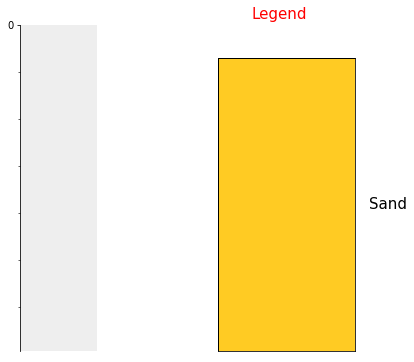

In [21]:
p.boreholes_3d[0].log_plot()

### The Borehole in 3D using X3D for interaction within the notebook

In [22]:
p.plot3d(x3d=True)